# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Javier, Michael Adrian \
_Student No._: 2019-04177 \
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 04/18/24

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: MICHAEL ADRIAN JAVIER**

### Grading Information (c/o Instructor)

TOTAL SCORE: **88**/100

Score breakdown:
* Part 1 - 28/30
* Part 2 - 30/30
* Part 3 - 30/40 #CDF not shown

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [21]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



([], [])

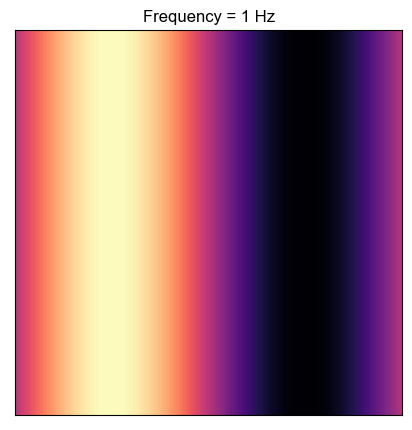

In [22]:
def sine(X, freq):
    return np.sin(freq*2*np.pi*X)

N = 500
line = np.linspace(0, 1, N)
X, Y = np.meshgrid(line, line)

plt.figure(figsize=(5,5))
plt.contourf(X, Y, sine(X, 1), 100, cmap='magma')
plt.title('Frequency = 1 Hz')
plt.xticks([])
plt.yticks([])

Text(0.5, 0.92, 'Frequency = 1 Hz')

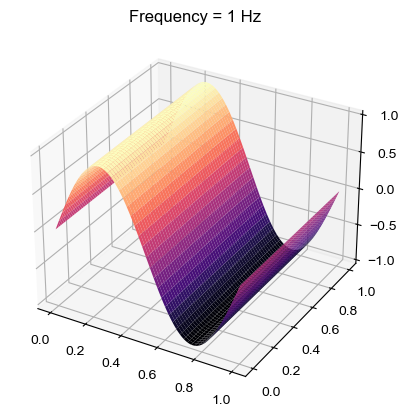

In [23]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.set_zlim(-1.01, 1.01)
ax.plot_surface(X, Y, sine(X, 1), cmap='magma')
ax.set_title('Frequency = 1 Hz')

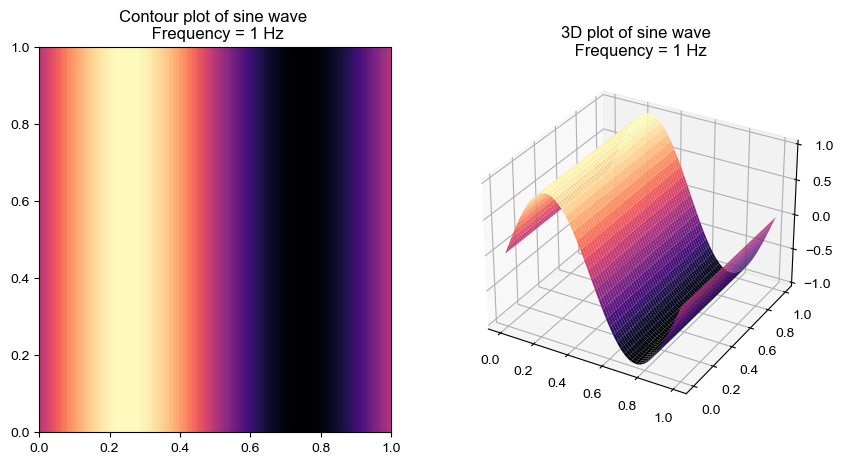

In [24]:
fig = plt.figure(figsize=(10, 5))

# Contour plot
ax = fig.add_subplot(1, 2, 1)
ax.contourf(X, Y, sine(X, 1), 100, cmap='magma')
ax.set_title('Contour plot of sine wave \n Frequency = 1 Hz')

# 3D plot
ax = fig.add_subplot(1, 2, 2, projection='3d') # need yung projection='3d' kasi 3d plot to
ax.set_zlim(-1.01, 1.01)
ax.plot_surface(X, Y, sine(X, 1), cmap='magma')
ax.set_title('3D plot of sine wave \n Frequency = 1 Hz')

plt.show()

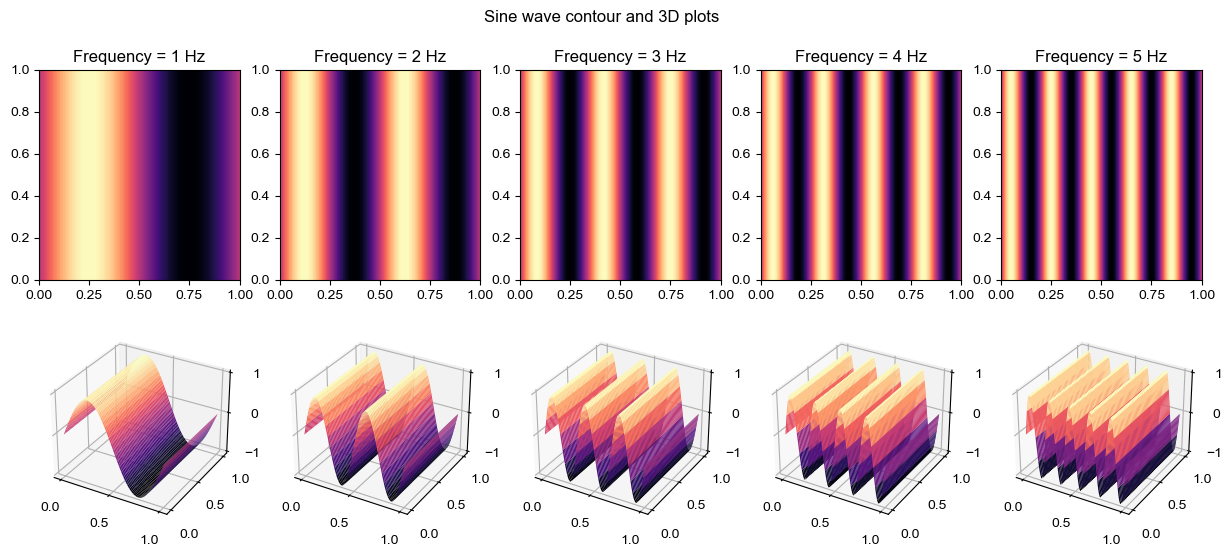

In [25]:
fig = plt.figure(figsize=(15, 6))

plt.suptitle('Sine wave contour and 3D plots')

for i in range(1, 5+1):
    # Contour plot
    ax = fig.add_subplot(2, 5, i)
    ax.contourf(X, Y, sine(X, i), 100, cmap='magma')
    ax.set_title('Frequency = {freq} Hz'.format(freq=i))

    # 3D plot
    ax = fig.add_subplot(2, 5, 5+i, projection='3d') # need yung projection='3d' kasi 3d plot to
    ax.set_zlim(-1.01, 1.01)
    ax.plot_surface(X, Y, sine(X, i), cmap='magma')
    #ax.set_title('3D plot of sine wave \n Frequency = {freq} Hz'.format(freq=i))

plt.show()

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

Let's try to create circles first

In [26]:
n = 100

mpt = np.zeros([n, n])

Text(0.5, 1.0, 'Circle')

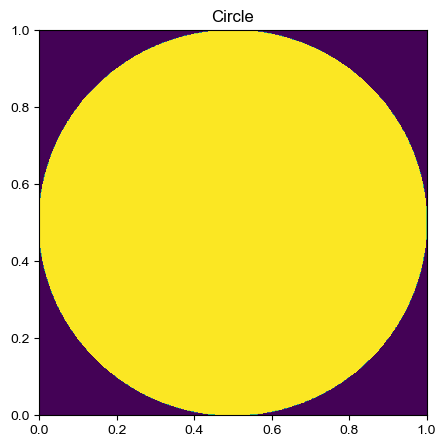

In [49]:
rad = 0.5
def circ(xi, yi, x0, y0, rad):
    condlist = [np.sqrt((xi-x0)**2 + (yi-y0)**2) <= rad, np.sqrt((xi-x0)**2 + (yi-y0)**2) > rad]
    choicelist = [1, 0]
    return np.select(condlist, choicelist)

plt.figure(figsize=(5,5))
plt.contourf(X, Y, circ(X, Y, 0.5, 0.5, 0.5), 100)
plt.title('Circle')

Let's try if we can add multiple `np.select`'s

$$
\begin{align}
(x-0.25)^2 + (y-0.25)^2 & = \left(0.25 \right)^2 \\
(x-0.75)^2 + (y-0.25)^2 & = \left(0.25 \right)^2 \\
(x-0.25)^2 + (y-0.75)^2 & = \left(0.25 \right)^2 \\
(x-0.75)^2 + (y-0.75)^2 & = \left(0.25 \right)^2
\end{align}
$$

We should get an image like this:

<center>

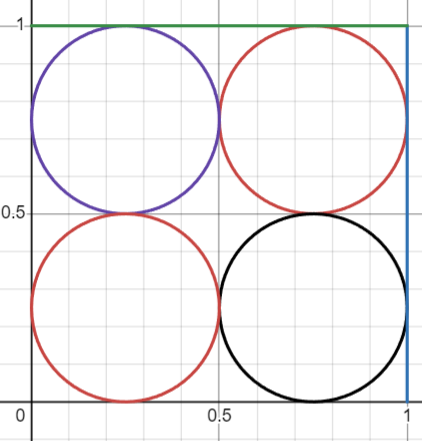

</center>

Text(0.5, 1.0, '4 tangential circles')

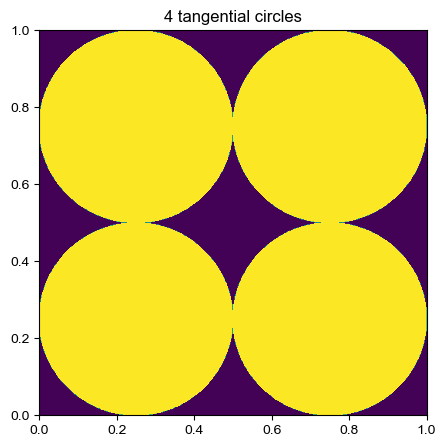

In [48]:
circle1 = circ(X, Y, 0.25, 0.25, 0.25)
circle2 = circ(X, Y, 0.75, 0.25, 0.25)
circle3 = circ(X, Y, 0.25, 0.75, 0.25)
circle4 = circ(X, Y, 0.75, 0.75, 0.25)
circs = circle1 + circle2 + circle3 + circle4

plt.figure(figsize=(5,5))
plt.contourf(X, Y, circs, 100)
plt.title('4 tangential circles')

Let's try to create an annulus then.

In [29]:
def anus(xi, yi, x0, y0, rin, rout):
    condlist = [np.sqrt((xi-x0)**2 + (yi-y0)**2) <= rout and np.sqrt((xi-x0)**2 + (yi-y0)**2) >= rin, \
        np.sqrt((xi-x0)**2 + (yi-y0)**2) > rout and np.sqrt((xi-x0)**2 + (yi-y0)**2) < rin]
    choicelist = [1, 0]
    return np.select(condlist, choicelist)

In [30]:
def anus(xi, yi, x0, y0, rin, rout):
    condlist = [np.logical_and(np.sqrt((xi-x0)**2 + (yi-y0)**2) <= rout, np.sqrt((xi-x0)**2 + (yi-y0)**2) >= rin), \
        np.logical_and(np.sqrt((xi-x0)**2 + (yi-y0)**2) > rout, np.sqrt((xi-x0)**2 + (yi-y0)**2) < rin)]
    choicelist = [1, 0]
    return np.select(condlist, choicelist)

Text(0.5, 1.0, 'Annulus')

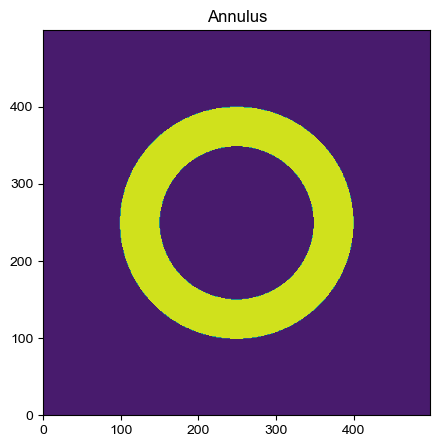

In [47]:
plt.figure(figsize=(5,5))
plt.contourf(anus(X, Y, 0.5, 0.5, 0.2, 0.3))
plt.title('Annulus')

Let's try to combine various colors to get the prism effect.

$$ \begin{align}
\text{red circle:} & \left(x-0.5\right)^{2}+\left(y-0.65\right)^{2}=\left(0.25\right)^{2} \\
\text{blue circle:} & \left(x-0.35\right)^{2}+\left(y-0.40\right)^{2}=\left(0.25\right)^{2} \\
\text{green circle:} & \left(x-0.65\right)^{2}+\left(y-0.40\right)^{2}=\left(0.25\right)^{2} 
\end{align} $$

<center>

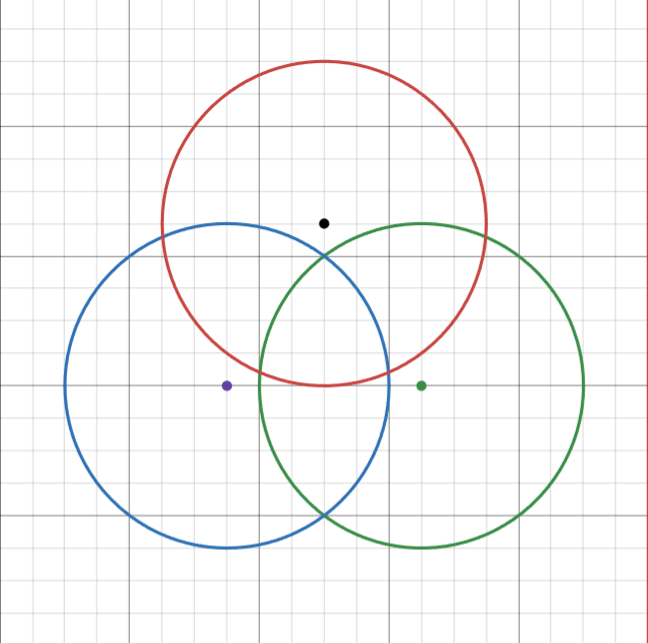

</center>

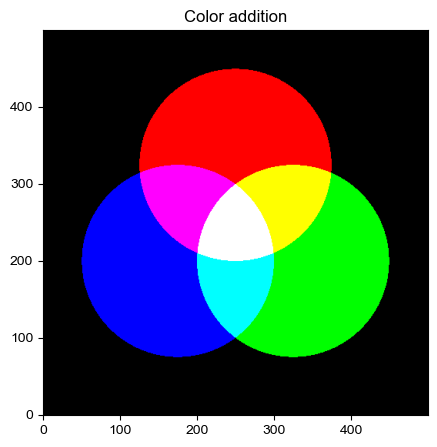

In [46]:
green_circ = circ(X, Y, 0.65, 0.40, 0.25)
blue_circ = circ(X, Y, 0.35, 0.40, 0.25)
red_circ = circ(X, Y, 0.50, 0.65, 0.25)

plt.figure(figsize=(5,5))
img = np.zeros((N, N, 3))
img[..., 0] = red_circ
img[..., 1] = green_circ
img[..., 2] = blue_circ
plt.imshow(img, origin='lower')
plt.title('Color addition')
plt.show()

The olympic symbols look like this.

<p align = 'center'>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1920px-Olympic_rings_without_rims.svg.png" width=400, align=center>
</p>

We can do this on Desmos using:

$$ \begin{align}
\text{blue circle:} & \left(x-0.17\right)^{2}+\left(y-0.55\right)^{2}=\left(0.15\right)^{2} \\
\text{black circle:} & \left(x-0.5\right)^{2}+\left(y-0.55\right)^{2}=\left(0.15\right)^{2} \\
\text{red circle:} & \left(x-0.83\right)^{2}+\left(y-0.55\right)^{2}=\left(0.15\right)^{2} \\
\text{yellow circle:} & \left(x-0.35\right)^{2}+\left(y-0.40\right)^{2}=\left(0.15\right)^{2} \\
\text{green circle:} & \left(x-0.68\right)^{2}+\left(y-0.40\right)^{2}=\left(0.15\right)^{2}
\end{align} $$

<center>

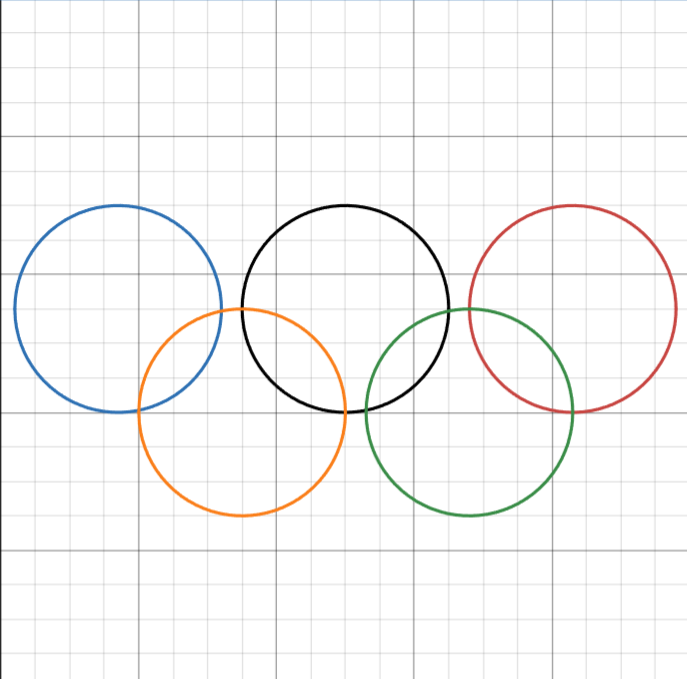

</center>

Since we only have red, green, and blue color channels, we need to combine circles in different color channels to create the desired color.
- blue circle: blue channel
- black circle: no channel
- red circle: red channel
- yellow circle: red and green channel
- green circle: green channel

One challenge here is how to create the black circle. Black is the absence of color. If we go by this principle, it will be hard to subtract everything just to get black.

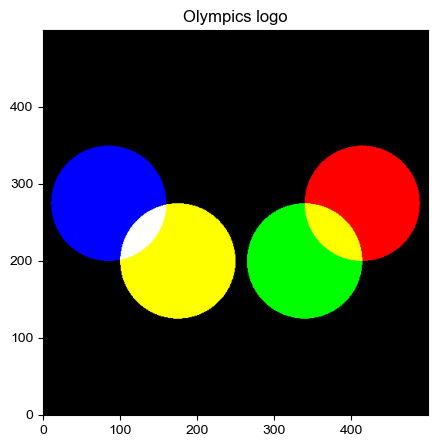

In [45]:
circ_bl = circ(X, Y, 0.17, 0.55, 0.15)
circ_bk = circ(X, Y, 0.50, 0.55, 0.15)
circ_r = circ(X, Y, 0.83, 0.55, 0.15)
circ_y = circ(X, Y, 0.35, 0.40, 0.15)
circ_g = circ(X, Y, 0.68, 0.40, 0.15)

plt.figure(figsize=(5,5))
img1 = np.zeros((N, N, 3))
img1[..., 0] = circ_r + circ_y # red channel
img1[..., 1] = circ_g + circ_y # green channel
img1[..., 2] = circ_bl # blue channel
plt.imshow(img1, origin='lower')
plt.title('Olympics logo')
plt.show()

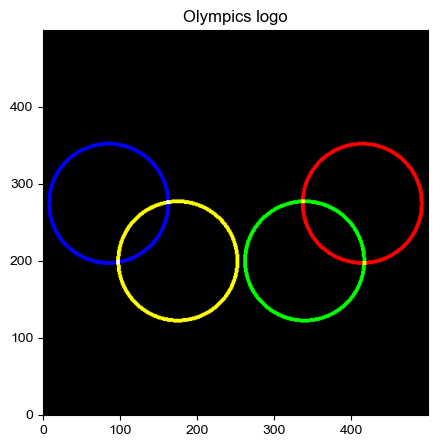

In [44]:
circ_bl = anus(X, Y, 0.17, 0.55, 0.15, 0.16)
circ_bk = anus(X, Y, 0.50, 0.55, 0.15, 0.16)
circ_r = anus(X, Y, 0.83, 0.55, 0.15, 0.16)
circ_y = anus(X, Y, 0.35, 0.40, 0.15, 0.16)
circ_g = anus(X, Y, 0.68, 0.40, 0.15, 0.16)

plt.figure(figsize=(5,5))
img1 = np.zeros((N, N, 3))
img1[..., 0] = circ_r + circ_y # red channel
img1[..., 1] = circ_g + circ_y # green channel
img1[..., 2] = circ_bl # blue channel
plt.imshow(img1, origin='lower')
plt.title('Olympics logo')
plt.show()

Let's try adding the white colored background. Subtracting the pieces would also help. 

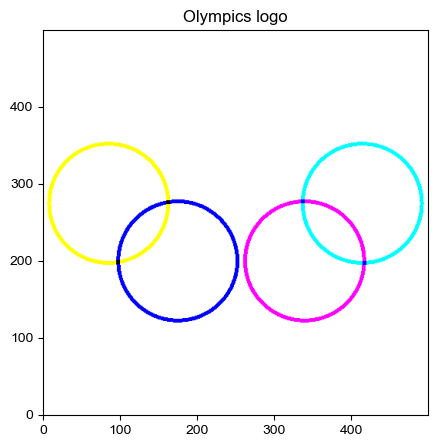

In [43]:
circ_bl = anus(X, Y, 0.17, 0.55, 0.15, 0.16)
circ_bk = anus(X, Y, 0.50, 0.55, 0.15, 0.16)
circ_r = anus(X, Y, 0.83, 0.55, 0.15, 0.16)
circ_y = anus(X, Y, 0.35, 0.40, 0.15, 0.16)
circ_g = anus(X, Y, 0.68, 0.40, 0.15, 0.16)

plt.figure(figsize=(5,5))
img1 = np.zeros((N, N, 3))
img1[..., 0] = np.ones((N, N)) - circ_r - circ_y # red channel
img1[..., 1] = np.ones((N, N)) - circ_g - circ_y # green channel
img1[..., 2] = np.ones((N, N)) - circ_bl # blue channel
plt.imshow(img1, origin='lower')
plt.title('Olympics logo')
plt.show()

The colors changed which makes sense as 

$$ \begin{align}
w - b = (r+g+b) - b = r+g &= y \\
w - r = (r+g+b) - r = g+b &= c \\
w - y = (r+g+b) - (r+g) & = b \\
w - g = (r+g+b) - g = r+b & = m
\end{align} $$

If we want to do this subtraction method just to keep the white background, we need to subtract everything in the proper channels to get the proper colors. 

$$ \begin{align}
b & = w - r - g \\
k & = w - r - g - b \\
r & = w - b - g \\
y & = w - b \\
g & = w - r - b 
\end{align} $$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


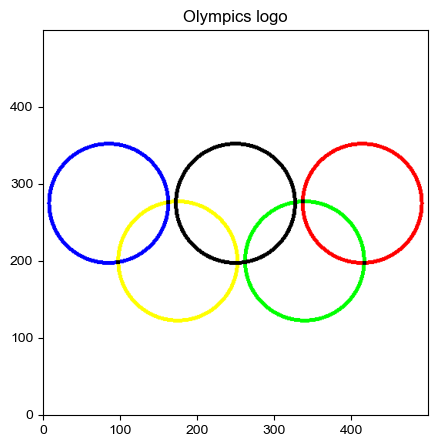

In [41]:
circ_bl = anus(X, Y, 0.17, 0.55, 0.15, 0.16)
circ_bk = anus(X, Y, 0.50, 0.55, 0.15, 0.16)
circ_r = anus(X, Y, 0.83, 0.55, 0.15, 0.16)
circ_y = anus(X, Y, 0.35, 0.40, 0.15, 0.16)
circ_g = anus(X, Y, 0.68, 0.40, 0.15, 0.16)

plt.figure(figsize=(5,5))
img2 = np.zeros((N, N, 3))
img2[..., 0] = np.ones((N, N)) - circ_bl - circ_bk - circ_g # red channel
img2[..., 1] = np.ones((N, N)) - circ_bl - circ_bk - circ_r # green channel
img2[..., 2] = np.ones((N, N)) - circ_bk - circ_r - circ_y - circ_g # blue channel
plt.imshow(img2, origin='lower')
plt.title('Olympics logo')
plt.show()

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

Text(0.5, 1.0, 'Contrast-stretched image of the astronaut')

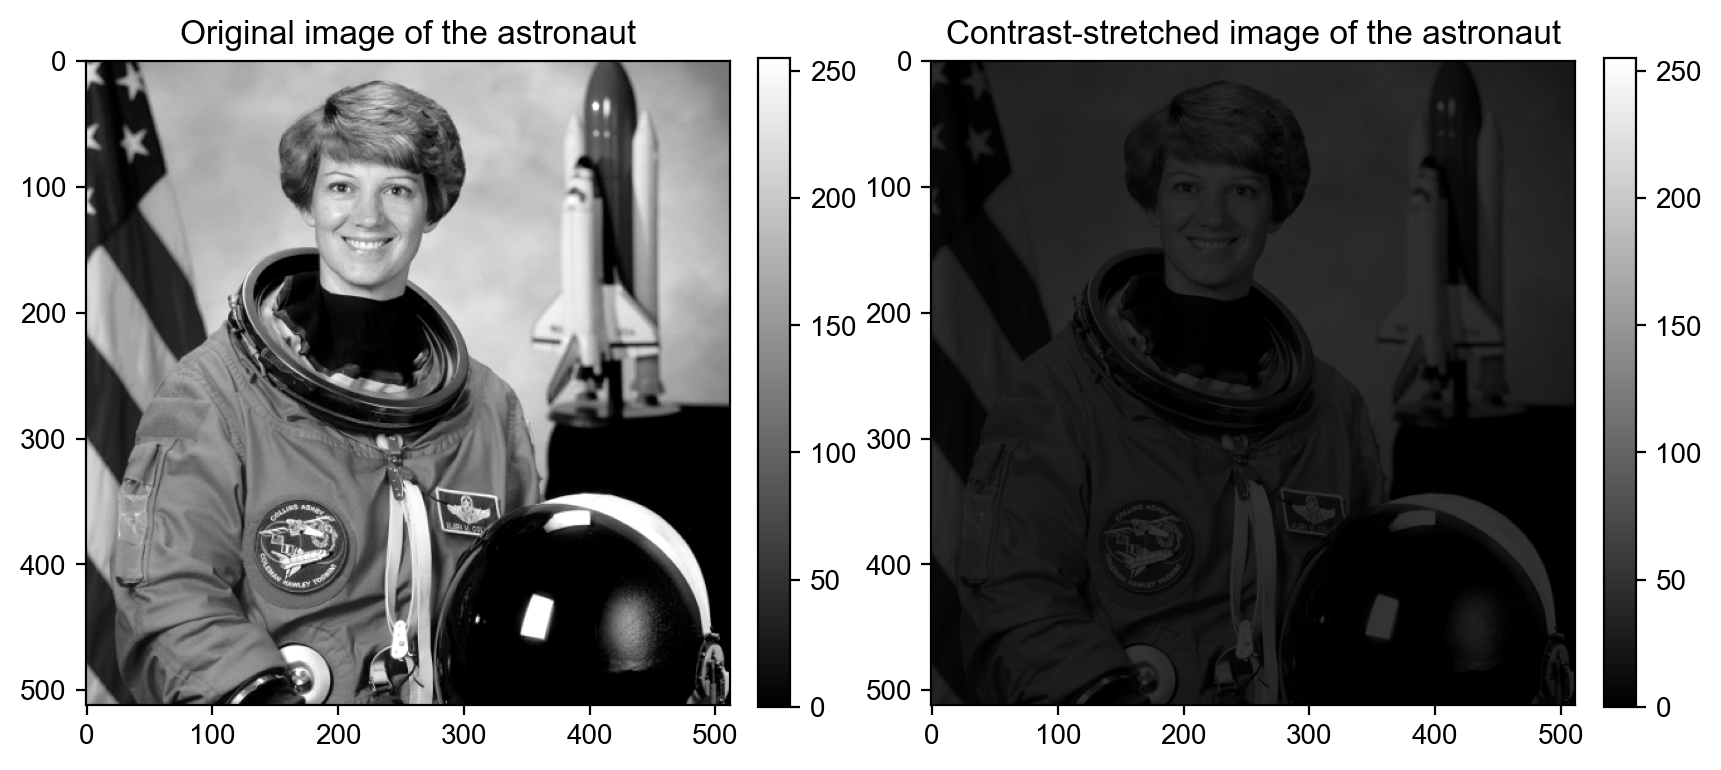

In [51]:
from skimage import color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Original image of the astronaut')

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Contrast-stretched image of the astronaut')

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

Text(0.5, 1.0, 'Image histogram')

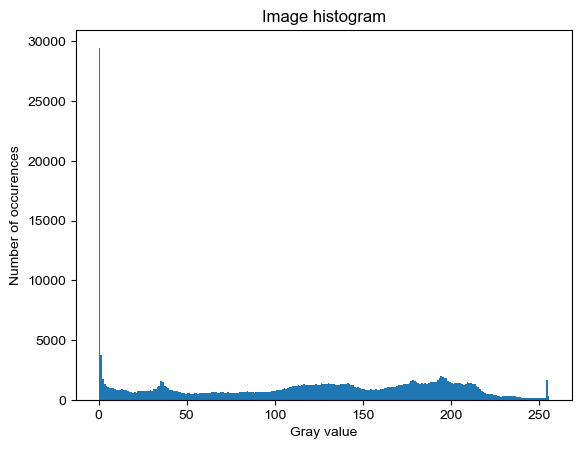

In [38]:
flat_img = img.flatten()
plt.hist(flat_img, bins=256)
plt.xlabel('Gray value')
plt.ylabel('Number of occurences')
plt.title('Image histogram')

Normalizing the image histogram we have,

Text(0.5, 1.0, 'Normalized image histogram')

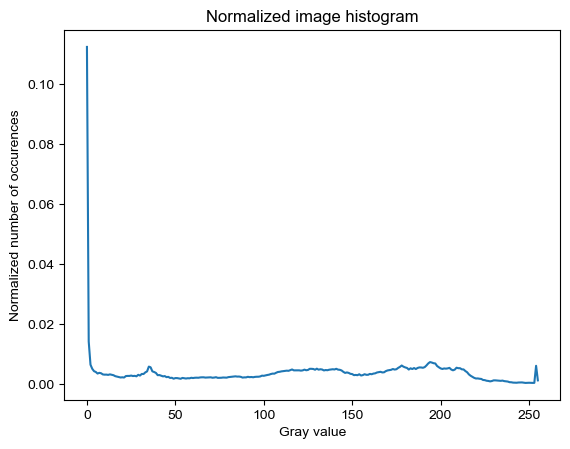

In [39]:
img_tot = np.sum(flat_img)
flat_img = flat_img/img_tot

hist = np.histogram(flat_img,bins=256)
norm_hist = hist[0]/np.sum(hist[0])
cum_hist = np.cumsum(norm_hist)

plt.plot(norm_hist)
plt.xlabel('Gray value')
plt.ylabel('Normalized number of occurences')
plt.title('Normalized image histogram')

Compiling them all together, we have

Text(0.5, 1.0, 'Normalized image histogram')

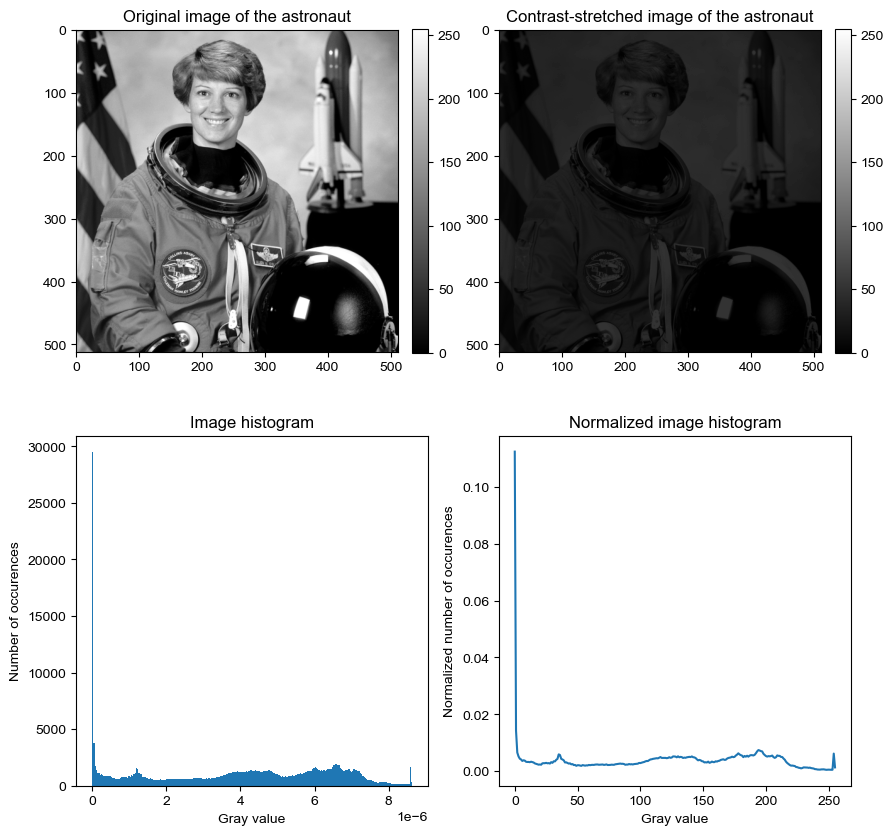

In [52]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Original image of the astronaut')

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(222)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Contrast-stretched image of the astronaut')

plt.subplot(223)
plt.hist(flat_img, bins=256)
plt.xlabel('Gray value')
plt.ylabel('Number of occurences')
plt.title('Image histogram')

plt.subplot(224)
plt.plot(norm_hist)
plt.xlabel('Gray value')
plt.ylabel('Normalized number of occurences')
plt.title('Normalized image histogram')